In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns   

In [2]:
house = pd.read_csv('house_votes_mod.csv')

In [3]:
house.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
1,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
2,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
3,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1
4,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1


In [4]:
house.shape

(434, 17)

In [5]:
house.describe()

,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
count,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000
mean,0.430876,0.447005,0.582949,0.405530,0.486175,0.624424,0.550691,0.557604,0.476959,0.495392,0.345622,0.391705,0.479263,0.569124,0.400922,0.617512
std,0.495770,0.497757,0.493640,0.491561,0.500386,0.484830,0.497998,0.497244,0.500045,0.500556,0.476120,0.488695,0.500146,0.495770,0.490651,0.486556
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   party              434 non-null    object
 1   infants            434 non-null    int64 
 2   water              434 non-null    int64 
 3   budget             434 non-null    int64 
 4   physician          434 non-null    int64 
 5   salvador           434 non-null    int64 
 6   religious          434 non-null    int64 
 7   satellite          434 non-null    int64 
 8   aid                434 non-null    int64 
 9   missile            434 non-null    int64 
 10  immigration        434 non-null    int64 
 11  synfuels           434 non-null    int64 
 12  education          434 non-null    int64 
 13  superfund          434 non-null    int64 
 14  crime              434 non-null    int64 
 15  duty_free_exports  434 non-null    int64 
 16  eaa_rsa            434 non-null    int64 
dt

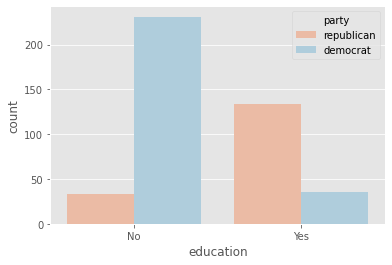

In [7]:
plt.figure()
sns.countplot(x='education', hue='party', data=house, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

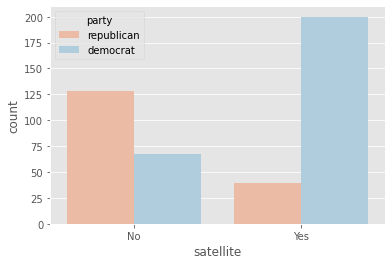

In [8]:
plt.figure()
sns.countplot(x='satellite', hue='party', data=house, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

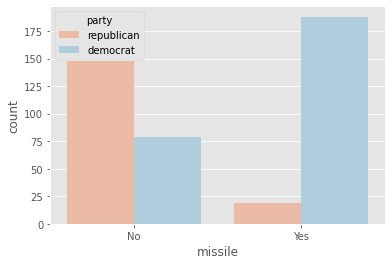

In [9]:
plt.figure()
sns.countplot(x='missile', hue='party', data=house, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

In [17]:
y = house['party'].values
X = house.drop('party', axis=1).values

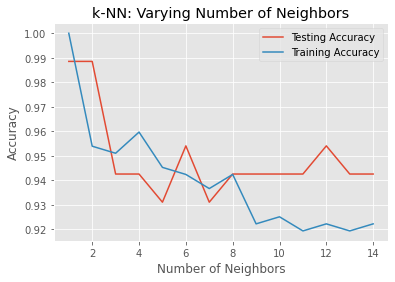

In [22]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 21, stratify= y)
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test,y_test)

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [23]:
knn = KNeighborsClassifier (n_neighbors= 2)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9885057471264368